#### **Step 1 : Load all required libraries**
*************************************************************************************************************************

In [1]:
import sys
import platform
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import plotly.express as px
py.offline.init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()
cf.getThemes()

print(f"Executable Python: {sys.executable}")
print(f"Python Version: {platform.python_version()}")

#To show multiple outputs and misc. changes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # Show all results without print (last_expr)

Executable Python: C:\Users\maity\.conda\envs\aku_mldl\python.exe
Python Version: 3.9.6


#### **Step 2 : Load all required Data & check for null values**
*************************************************************************************************************************

In [2]:
Data_CWA= pd.read_csv("G:\\My Drive\\Projects\\Malnutrition across the globe\\data3\\country-wise-average.csv")
Data_Estimates = pd.read_csv("G:\\My Drive\\Projects\\Malnutrition across the globe\\data3\\malnutrition-estimates.csv")
Data_CWA.head()
Data_CWA.info()
Data_Estimates.head()
Data_Estimates.info()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                152 non-null    object 
 1   Income Classification  152 non-null    float64
 2   Severe Wasting         140 non-null    float64
 3   Wasting                150 non-null    float64
 4   Overweight             149 non-null    float64
 5   Stunting               151 non-null    float64
 6   Underweight            150 non-null    float64
 7   U5 Population ('000s)  152 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             924 non-null    int64  
 1   ISO code               924 non-null    object 
 2   Country                924 non-null    object 
 3   Survey Year            924 non-null    object 
 4   Year                   924 non-null    int64  
 5   Income Classification  924 non-null    int64  
 6   LDC                    924 non-null    float64
 7   LIFD                   924 non-null    float64
 8   LLDC or SID2           924 non-null    float64
 9   Survey Sample (N)      861 non-null    object 
 10  Severe Wasting         696 non-null    float64
 11  Wasting                877 non-null    float64
 12  Overweight             788 non-null    float64
 13  Stunting               887 non-null    float64
 14  Underweight            902 non-null    float64
 15  Notes 

#### **Step 3 : Make a Dataframe of useful columns from Data Estimates table**
*************************************************************************************************************************

In [3]:
mal_countries = Data_Estimates[['ISO code','Country','Survey Year','Income Classification','LDC','LIFD','LLDC or SID2','Survey Sample (N)','Severe Wasting','Wasting','Stunting','Overweight','Underweight',"U5 Population ('000s)"]]
mal_countries.head()
mal_countries.info()

,ISO code,Country,Survey Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Stunting,Overweight,Underweight,U5 Population ('000s)
0,AFG,AFGHANISTAN,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,53.2,6.5,44.9,3838.877
1,AFG,AFGHANISTAN,2004,0,1.0,1.0,1.0,946,3.5,8.6,59.3,4.6,32.9,4789.353
2,AFG,AFGHANISTAN,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,40.4,5.3,24.6,5444.573
3,AFG,AFGHANISTAN,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,38.2,4.1,19.1,5601.443
4,ALB,ALBANIA,1996-98,2,0.0,0.0,0.0,"7,642",NaN,8.1,20.4,9.5,7.1,309.225


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ISO code               924 non-null    object 
 1   Country                924 non-null    object 
 2   Survey Year            924 non-null    object 
 3   Income Classification  924 non-null    int64  
 4   LDC                    924 non-null    float64
 5   LIFD                   924 non-null    float64
 6   LLDC or SID2           924 non-null    float64
 7   Survey Sample (N)      861 non-null    object 
 8   Severe Wasting         696 non-null    float64
 9   Wasting                877 non-null    float64
 10  Stunting               887 non-null    float64
 11  Overweight             788 non-null    float64
 12  Underweight            902 non-null    float64
 13  U5 Population ('000s)  924 non-null    float64
dtypes: float64(9), int64(1), object(4)
memory usage: 101.2+ KB

#### **Step 4 : Replacing null values by mean of their columns**
*************************************************************************************************************************

In [4]:
# fill nan with average for Severe Wasting, Wasting, Stunting, Overweight, Underweight, U5 Population ('000s)
mal_countries["Severe Wasting"].fillna(mal_countries["Severe Wasting"].mean(), inplace=True)
mal_countries["Wasting"].fillna(mal_countries["Wasting"].mean(), inplace=True)
mal_countries["Stunting"].fillna(mal_countries["Stunting"].mean(), inplace=True)
mal_countries["Overweight"].fillna(mal_countries["Overweight"].mean(), inplace=True)
mal_countries["Underweight"].fillna(mal_countries["Underweight"].mean(), inplace=True)
mal_countries["U5 Population ('000s)"].fillna(mal_countries["U5 Population ('000s)"].mean(), inplace=True)

#### **Step 5 : Converting categorical data columns into a yes or no categories**
*************************************************************************************************************************

In [5]:
mal_countries["Least_Developed_Country"] = mal_countries["LDC"].apply(lambda x: "Yes" if x == 1 else "No")
mal_countries["Low_Income_Food_Deficit"] = mal_countries["LIFD"].apply(lambda x: "Yes" if x == 1 else "No")
mal_countries["Landlocked_Developed_Countries"] = mal_countries["LLDC or SID2"].apply(lambda x: "Yes" if x == 1 else "No")
def condition(x):
    if x== 0 :
        return "Under Low Income"
    elif  x== 1 :
        return "Low Income"
    elif  x== 2 :
        return "Middle Income"
    else :
        return "High Income"

mal_countries["Income_Classification"] = mal_countries["Income Classification"].apply(condition)

#### **Step 6 : Converting survey sample column from object to string to fill the null values correctly and then again converting to numerical value**
*************************************************************************************************************************

In [6]:
# Convert Survey Sample (N) to string
mal_countries["Survey_Sample_N"] = mal_countries["Survey Sample (N)"].apply(lambda x: str(x))

# In Survey_Sample_N replace "nan" with blank
mal_countries["Survey_Sample_N"] = mal_countries["Survey_Sample_N"].apply(lambda x: x.replace("nan", ""))

# In Survey_Sample_N replace any character which is not a number with blank
mal_countries["Survey_Sample_N"] = mal_countries["Survey_Sample_N"].str.replace("[^0-9]", "")

# Convert Survey Sample (N) to numeric
mal_countries["Survey_Sample_N"] = pd.to_numeric(mal_countries["Survey_Sample_N"])

# replace nan values in survey_sample_n with mean of each country
mal_countries.groupby(["Country"]).agg({"Survey_Sample_N": "median"}).head(10)

C:\Users\maity\AppData\Local\Temp/ipykernel_5916/2864389901.py:8: FutureWarning:

The default value of regex will change from True to False in a future version.



,Survey_Sample_N
Country,
AFGHANISTAN,4846.0
ALBANIA,1489.0
ALGERIA,4357.0
ANGOLA,7468.0
ARGENTINA,91943.0
ARMENIA,1486.0
AUSTRALIA,518908.5
AZERBAIJAN,2275.5
BAHRAIN,1353.0


#### **Step 7 : Dropping all duplicate columns**
*************************************************************************************************************************

In [7]:
# drop multiple columns from the mal_countries 
mal_countries.drop(["LDC","LIFD","LLDC or SID2","Income Classification","Survey Sample (N)"], axis=1, inplace=True)

#### **Step 8 : Cleaning the survey year column by only choosing the year before the special character and later converting the column to datetime**
*************************************************************************************************************************

In [8]:
# keep only numbers before the hyphen from column survey year using replace regex
mal_countries['Survey Year']= mal_countries['Survey Year'].replace('\-\d*', '', regex=True)

# convert survey year to datetime
mal_countries['Survey Year'] = pd.to_datetime(mal_countries['Survey Year'], format='%Y')

#### **Step 9 : Changing income classification column from Data_CWA table to categorical column**
*************************************************************************************************************************

In [9]:
Data_CWA["Income Classification"]= Data_CWA["Income Classification"].astype("category")

### **Step 10 : Plotting Graphs to Draw Conclusions**
*************************************************************************************************************************

#### This is to determine if percent underweight of the country changes as the income classification increases 

In [10]:
Percent_Underweight_per_Country = px.scatter(Data_CWA.sort_values(by=["Income Classification","Underweight"], ascending=[True, True]).reset_index(drop=True), x='Underweight', y='Country',
color='Income Classification', height=600,width=1000, color_discrete_sequence=px.colors.qualitative.Dark24)
Percent_Underweight_per_Country.show()

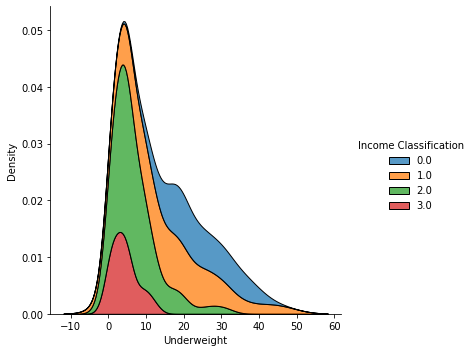

In [11]:
sns.displot(data=Data_CWA, x="Underweight", hue="Income Classification", multiple="stack", kind="kde")

#### This is to determine if percent overweight of the country changes as the income classification increases 

In [12]:
Percent_Overweight_per_Country = px.scatter(Data_CWA.sort_values(by=["Income Classification","Overweight"], ascending=[True, True]).reset_index(drop=True),
 x='Overweight', y='Country',color='Income Classification', height=600,width=1000, color_discrete_sequence=px.colors.qualitative.Safe)
Percent_Overweight_per_Country.show()


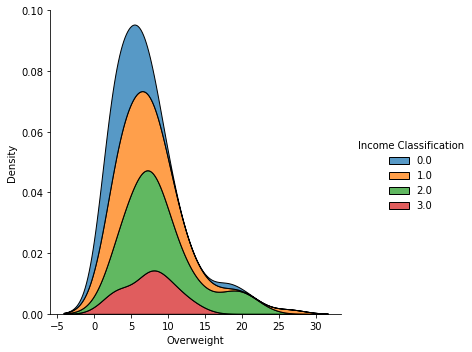

In [13]:
sns.displot(data=Data_CWA, x="Overweight", hue="Income Classification", multiple="stack", kind="kde")


#### Determine What percent children below the age of 5 are under the low weight-to-height ratio for each country as income classification decreases.

In [14]:
sever_wasting = px.histogram(Data_CWA.sort_values(by=["Income Classification","Severe Wasting"], ascending=[False,True]).reset_index(drop=True), 
x="Severe Wasting", y='Country',color= 'Income Classification',height=600,width=1000, color_discrete_sequence=px.colors.qualitative.Safe)
sever_wasting.show()

#### Countplot of Low income food deficit countries

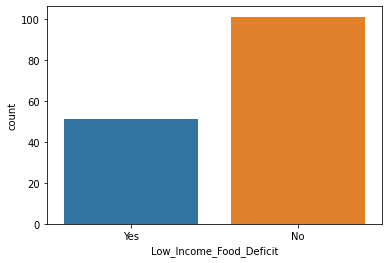

In [15]:
sns.countplot(x='Low_Income_Food_Deficit',data=mal_countries[["Low_Income_Food_Deficit", "Country"]].drop_duplicates());


#### Countplot of Least developed countries

<AxesSubplot:xlabel='Least_Developed_Country', ylabel='count'>

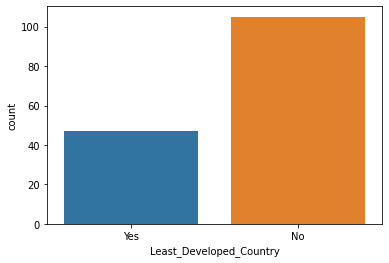

In [16]:
sns.countplot(x='Least_Developed_Country',data=mal_countries[["Least_Developed_Country", "Country"]].drop_duplicates())


#### Countplot of Landlocked Developed Countries or small island developing states

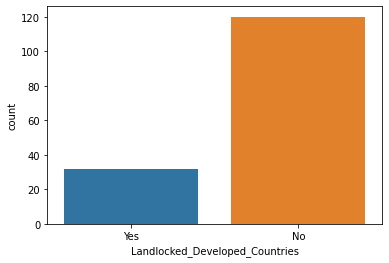

In [17]:
sns.countplot(x='Landlocked_Developed_Countries',data=mal_countries[["Landlocked_Developed_Countries", "Country"]].drop_duplicates());

#### Pairplot to show correaltion between the three important dimensions : severe wasting, underweight, overweight

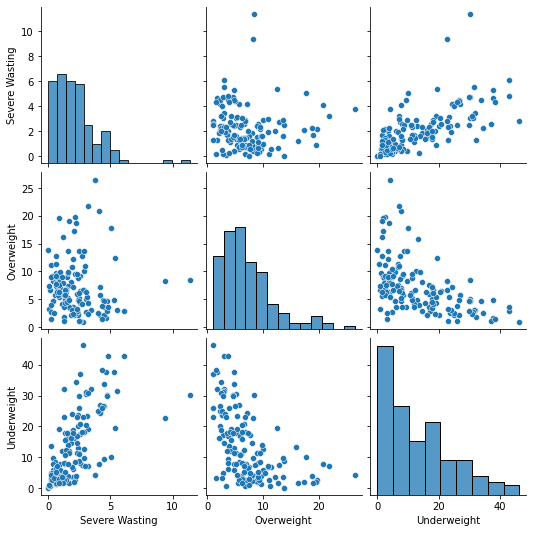

In [18]:
sns.pairplot(Data_CWA[['Severe Wasting','Overweight','Underweight']])
plt.show()

#### plotting what percent of children Under-five mortality rate (per 1000 live births) actually fall under the underweight category

In [19]:
# replace null values in Underweight column in df with mean of underweight of each country
Data_CWA["Underweight"]=Data_CWA["Underweight"].fillna(Data_CWA["Underweight"].mean())

# converting u5 population and underweight to integer 
Data_CWA["U5 Population ('000s)"] = Data_CWA["U5 Population ('000s)"].astype(np.int64)
Data_CWA["Underweight"]=Data_CWA["Underweight"].astype(np.int64)

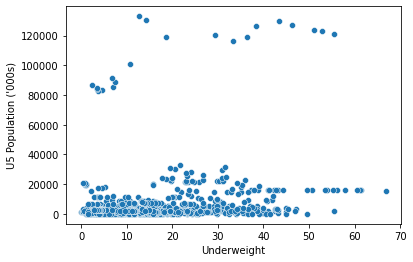

In [20]:
sns.scatterplot(data=mal_countries, x='Underweight', y='U5 Population (\'000s)');